In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.signal as sig

# Allpassfilter-Functions

In [3]:
def apA(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)
    w = zeros_like(x)
    T1 = zeros_like(x)
    T2 = zeros_like(x)

    for n in range(N):
        T1[n] = sqrt((1-g[n])/(1+g[n]))
        T2[n] = sqrt((1+g[n])/(1-g[n]))

        v[n] = x[n] - w[n-M]* T2[n]
        w[n] = (x[n] + g[n] * v[n]) * T1[n]
        y[n] = g[n] * v[n] + w[n-M]* T2[n]
        
    return y

In [4]:
def apLTI(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)

    for n in range(N):
        
        v[n] = x[n] - g[n] * v[n-M]  
        y[n] = v[n-M] + v[n] * g[n]
        
    return y

In [5]:
def apV(x, M, g):
    
    y = zeros_like(x)
    v = zeros_like(x)

    for n in range(N):

        v[n] = x[n] * sqrt(1-g[n]**2) - g[n]* v[n-M]
        y[n] = v[n-M] * sqrt(1-g[n]**2) + x[n] * g[n]

    return y

In [6]:
sr = 44100 # Samplingrate
T = 10 #Seconds
N = int(T*sr)
n = arange(N)
t = n/sr


freqAxis = linspace(0,sr/2,N//2) #x-Axis
M = 1 #Delaytime
per = 441

f = 100 #Input Signal Frequency
x = sin(pi*2*f*t) #Input Signal = 100Hz Sine Wave 
g = x * 0.9 #Attenuated Input Signal controls the Allpass-Gain
y = apA(x, M, g) #Modulated Allpassfilter

# DISTORTION

## Waveform and Magnitude Response of Input Signal

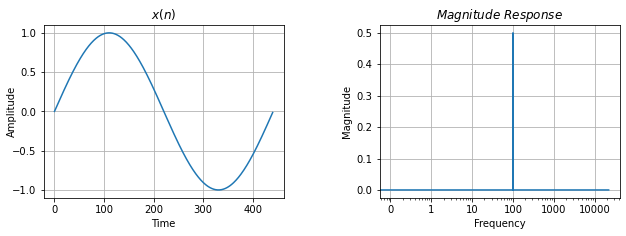

In [7]:
spec = fft.fft(x, norm='forward')[0:N//2]

figure(figsize=[10,3])

#Plot Magnitude Response
ax = subplot(122)
plot(freqAxis, abs(spec))
plt.xlabel('Frequency')
plt.ylabel('Magnitude', labelpad=5)
plt.xscale('log')
#plt.yscale('log')

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
title('$Magnitude$ $Response$')
grid()


#Plot Waveform
subplot(121)
plot(x[0:441])
plt.xlabel('Time')
plt.ylabel('Amplitude', labelpad=-5)

title('$x(n)$')
grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

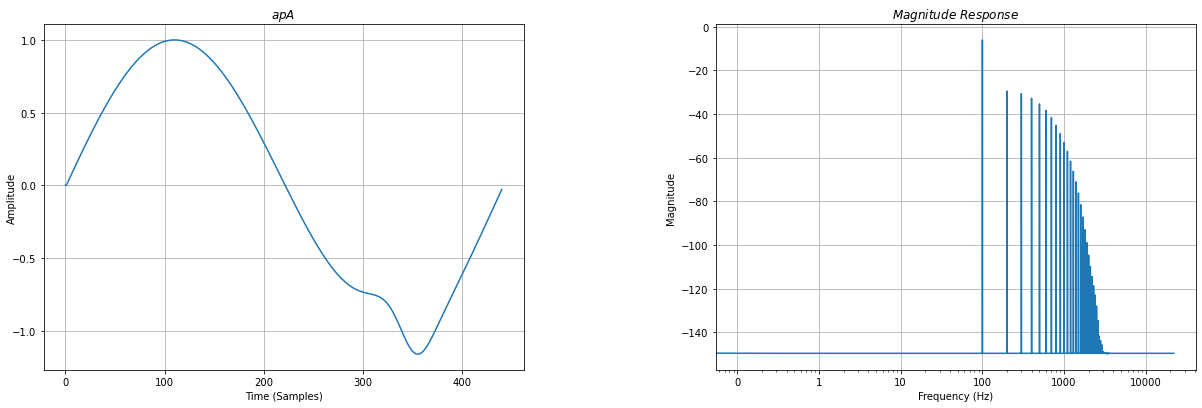

In [8]:
y = apA(x, M, g)

spec = fft.fft(y, norm='forward')[0:N//2] #FFT

figure(figsize=[20,6])

#Plot Magnitude Response
ax = subplot(122)
plt.xscale('log')
#plt.xlim([1000, 22500])
plot(freqAxis, 20 * log10(abs(spec)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude', labelpad=5)

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

title('$Magnitude$ $Response$')
grid()


#Plot Waveform
subplot(121)
plot(y[0:per])
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude', labelpad=-5)

title('$apA$')
grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

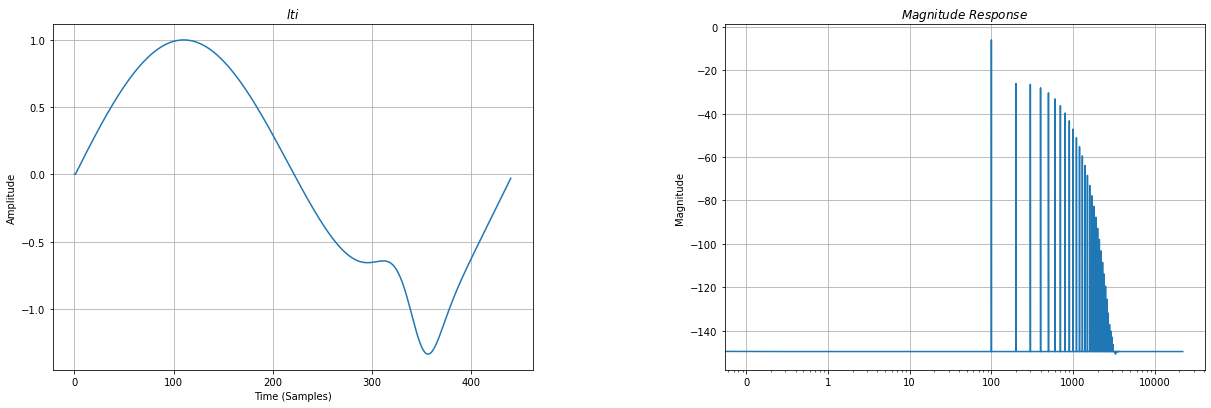

In [9]:
y2 = apLTI(x, M, g) 


spec2 = fft.fft(y2, norm='forward')[0:N//2]


figure(figsize=[20,6])

#Plot Magnitude Response
ax = subplot(122)
plt.xscale('log')
plot(freqAxis, 20 * log10(abs(spec2)))
plt.ylabel('Magnitude', labelpad=5)

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    
title('$Magnitude$ $Response$')
grid()


#Plot Waveform
subplot(121)
plot(y2[0:441])
plt.xlabel('Frequency (Hz)')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude')
title('$lti$')
grid()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

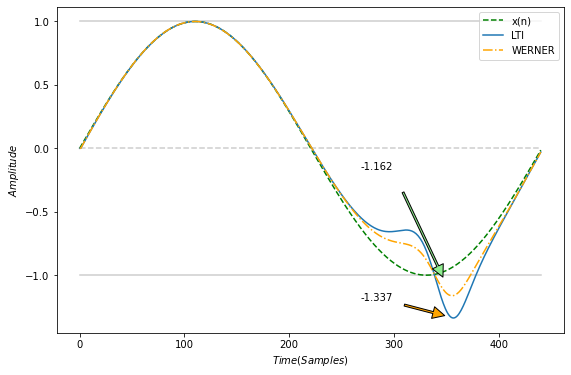

In [10]:
#Compare the waveforms


figure(figsize=[20,6])

ax = subplot(121)
plot(ones(per), color = 'k', alpha=0.2)
plot(ones(per)*-1, color = 'k', alpha=0.2)
plot(zeros(per),'--', color = 'k', alpha=0.2)
plot(x[0:per],'--',label='x(n)', color = 'green')
#plot(y3[0:per],label='Schroeder')
#plot(y4[0:per],label='Non-Linear')
plot(y2[0:per],label='LTI')
plot(y[0:per],'-.',label='WERNER', color ='orange')

ax.annotate(round(y2.min(),3), xy=(y2[0:per].argmin(), y2.min()),  xycoords='data',
            xytext=(0.6, 0.1), textcoords='axes fraction',
            arrowprops=dict( facecolor='orange',width=2, shrink=0.15),
            
            )
ax.annotate(round(y.min(),3), xy=(y[0:per].argmin(), y.min()),  xycoords='data',
            xytext=(0.6, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='lightgreen',width=2, shrink=0.15),
            
            )


plt.xlabel('$Time (Samples)$')
plt.ylabel('$Amplitude$')
plt.legend(loc='upper right')

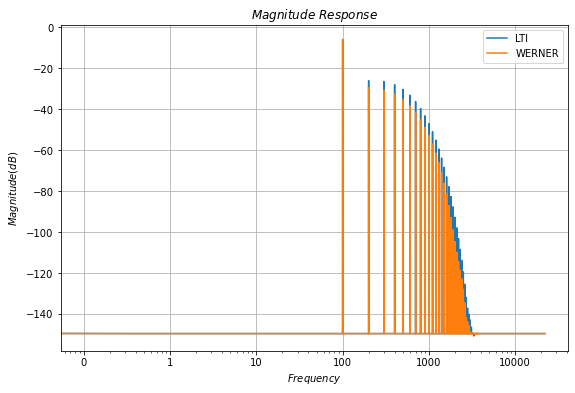

In [11]:
#Compare the spectra

figure(figsize=[20,6])

ax = subplot(122)
#plt.yscale('log')
plt.xscale('log')
#plt.xlim([xmin, sr/2])
#plt.ylim([-120, 0])
#plt.axis([20.0, 2000.0, 0.0, 1.01])


plot(freqAxis,20 * log10(abs(spec2)), label='LTI')
plot(freqAxis,20 * log10(abs(spec)), label='WERNER')


plt.xlabel('$Frequency$')
plt.ylabel('$Magnitude (dB)$', labelpad=5)

from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())


title('$Magnitude$ $Response$')
grid()

plt.legend()

# Aliasing

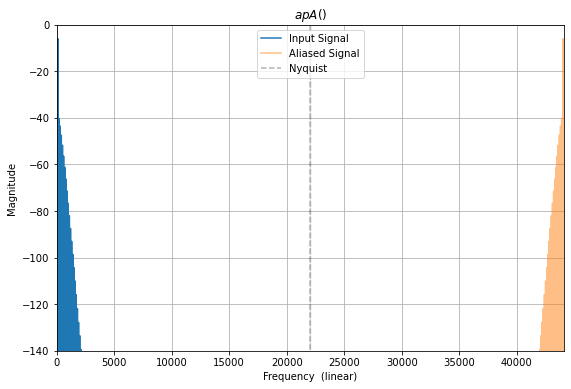

In [18]:
sr = 88200 #double the Samplingrate
T = 10
N = int(T*sr)
n = arange(N)
t = n/sr

f = 100
x = sin(pi*2*f*t) #Input Signal


freqAxis = linspace(0,sr/2,N//2) #x-Axis
M = 1 #Delaytime

g = x * 0.8 #Attenuated Input Signal controls the Allpass-Gain

figure(figsize=[20,6])
y3 = apA(x, M, g)
spec3 = fft.fft(y3, norm='forward')[0:N//2]
ax = subplot(122)
#plt.xscale('log')
nyq = zeros(44100)

dbMag = 20 * log10(abs(spec3))
#nyq[22050]=dbMag[1000].min()
nyq[22050]=-140
magRev = flip(dbMag)
amount = round((N/2-1)-(magRev.argmax() - ((220500 - dbMag.argmax()) + 220500)))
magRev = np.roll(magRev, amount)
#dbMag2 = dbMag[220500:].fill(dbMag[1000].min())
plot(freqAxis, 20 * log10(abs(spec3)), label='Input Signal')
plot(freqAxis, magRev, label='Aliased Signal', alpha = 0.5)
plot(nyq,'--', color ='black', alpha = 0.3, label = 'Nyquist')
legend(loc = 'upper center')
plt.xlabel('Frequency  (linear)')
plt.ylabel('Magnitude', labelpad=5)
xlim(0,44099)
ylim(-140, 0)
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())


title('$apA()$')
grid()